In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from google.colab import files
uploaded = files.upload()


Saving project1_df.csv to project1_df.csv


In [11]:
import io
df = pd.read_csv(io.BytesIO(uploaded['project1_df.csv']))


In [12]:
df.head()

,CID,TID,Gender,Age Group,Purchase Date,Product Category,Discount Availed,Discount Name,Discount Amount (INR),Gross Amount,Net Amount,Purchase Method,Location
0,943146,5876328741,Female,25-45,30/08/2023 20:27:08,Electronics,Yes,FESTIVE50,64.30,725.304000,661.004000,Credit Card,Ahmedabad
1,180079,1018503182,Male,25-45,23/02/2024 09:33:46,Electronics,Yes,SEASONALOFFER21,175.19,4638.991875,4463.801875,Credit Card,Bangalore
2,337580,3814082218,Other,60 and above,06/03/2022 09:09:50,Clothing,Yes,SEASONALOFFER21,211.54,1986.372575,1774.832575,Credit Card,Delhi
3,180333,1395204173,Other,60 and above,04/11/2020 04:41:57,Sports & Fitness,No,NaN,0.00,5695.612650,5695.612650,Debit Card,Delhi
4,447553,8009390577,Male,18-25,31/05/2022 17:00:32,Sports & Fitness,Yes,WELCOME5,439.92,2292.651500,1852.731500,Credit Card,Delhi


In [13]:
df.isnull().sum()


,0
CID,0
TID,0
Gender,0
Age Group,0
Purchase Date,0
Product Category,0
Discount Availed,0
Discount Name,27585
Discount Amount (INR),0
Gross Amount,0


In [14]:
df.fillna(method='ffill', inplace=True)


/tmp/ipython-input-4002983762.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [15]:
df.drop_duplicates(inplace=True)


In [17]:
print(df.columns)


Index(['CID', 'TID', 'Gender', 'Age Group', 'Purchase Date',
       'Product Category', 'Discount Availed', 'Discount Name',
       'Discount Amount (INR)', 'Gross Amount', 'Net Amount',
       'Purchase Method', 'Location'],
      dtype='object')


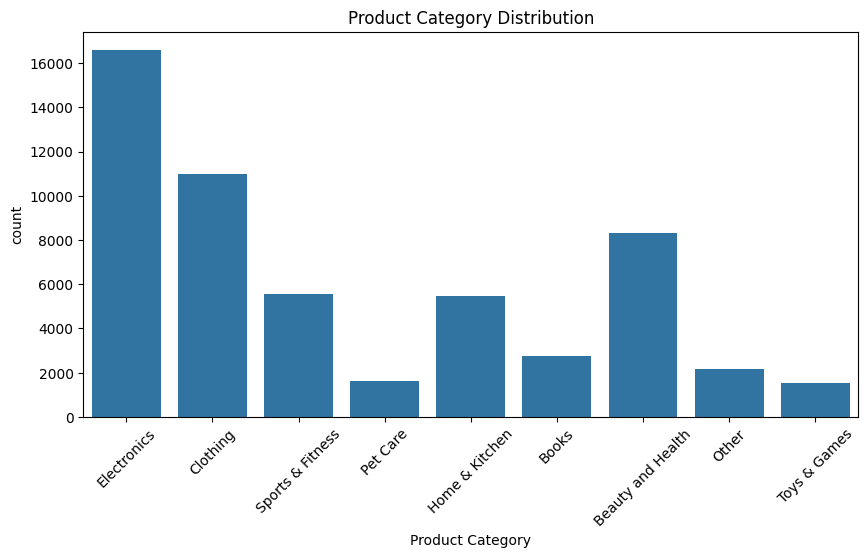

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(x='Product Category', data=df)
plt.title('Product Category Distribution')
plt.xticks(rotation=45)  # Optional: rotate x-axis labels if long
plt.show()


In [21]:
df['Product Category']

,Product Category
0,Electronics
1,Electronics
2,Clothing
3,Sports & Fitness
4,Sports & Fitness
...,...
54995,Electronics
54996,Electronics
54997,Home & Kitchen
54998,Beauty and Health


/tmp/ipython-input-3317658279.py:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])  # Convert to datetime


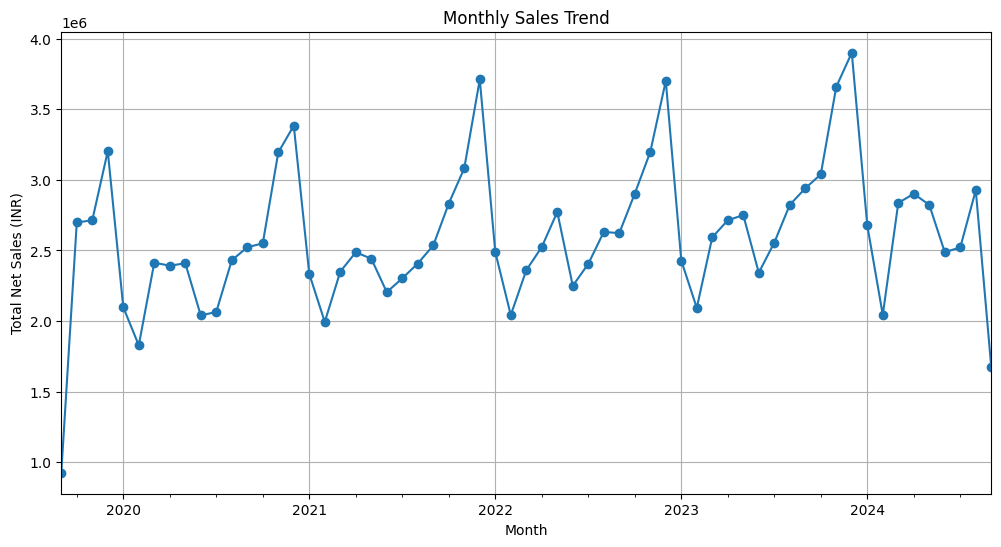

In [22]:
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])  # Convert to datetime

monthly_sales = df.groupby(df['Purchase Date'].dt.to_period('M'))['Net Amount'].sum()

monthly_sales.plot(kind='line', figsize=(12,6), marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Net Sales (INR)')
plt.grid(True)
plt.show()


/tmp/ipython-input-3284128511.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers.values, y=top_customers.index, palette='viridis')


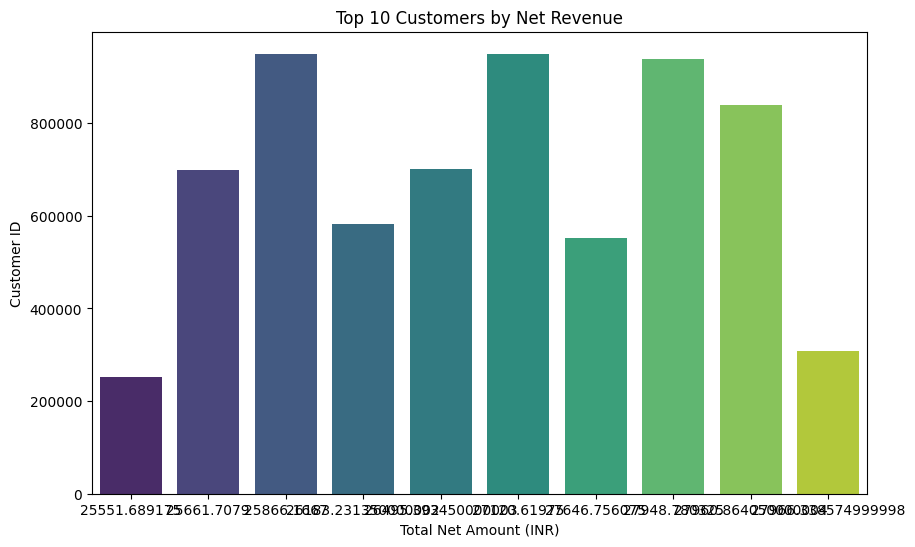

In [23]:
top_customers = df.groupby('CID')['Net Amount'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_customers.values, y=top_customers.index, palette='viridis')
plt.title('Top 10 Customers by Net Revenue')
plt.xlabel('Total Net Amount (INR)')
plt.ylabel('Customer ID')
plt.show()


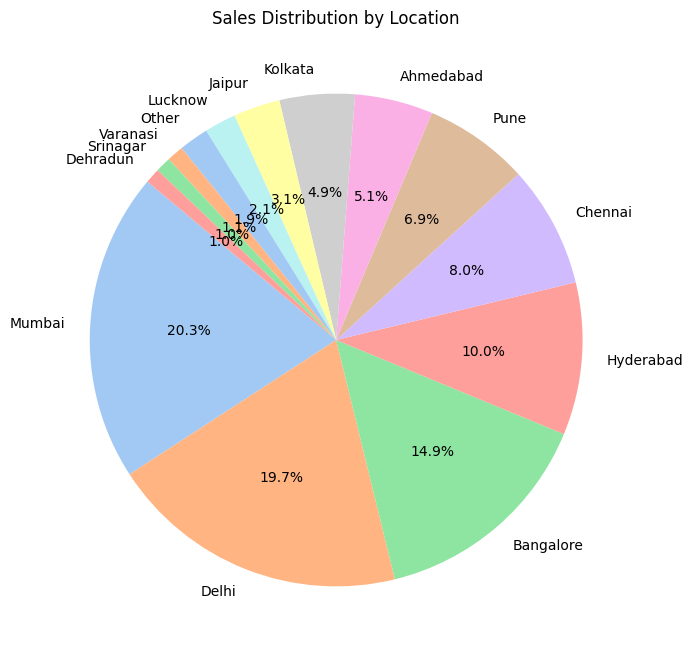

In [24]:
location_sales = df.groupby('Location')['Net Amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,8))
location_sales.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Sales Distribution by Location')
plt.ylabel('')  # Hide y-label
plt.show()


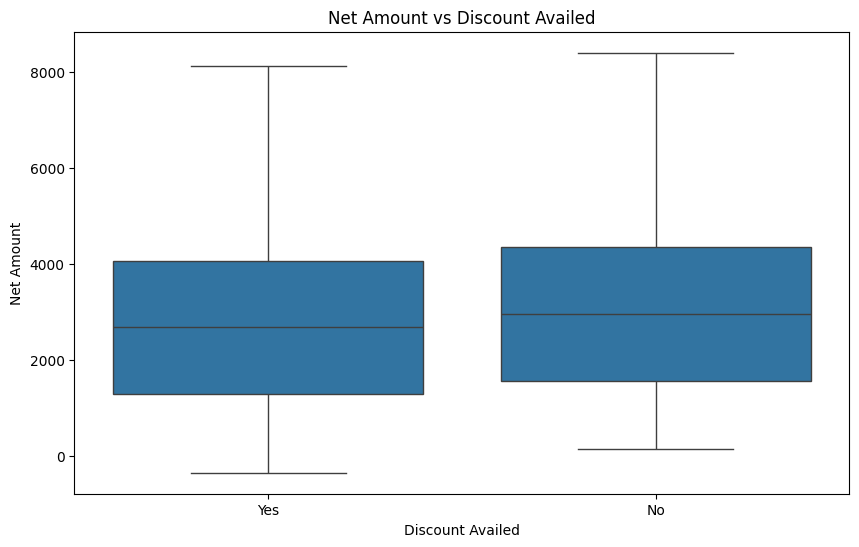

In [25]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Discount Availed', y='Net Amount', data=df)
plt.title('Net Amount vs Discount Availed')
plt.show()


In [26]:
!pip install ipywidgets
!pip install seaborn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.2 MB/s eta 0:00:00


In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output


In [28]:
from google.colab import files
uploaded = files.upload()

# Load DataFrame
for file_name in uploaded.keys():
    df = pd.read_csv(file_name)

df.head()


Saving project1_df.csv to project1_df (1).csv


,CID,TID,Gender,Age Group,Purchase Date,Product Category,Discount Availed,Discount Name,Discount Amount (INR),Gross Amount,Net Amount,Purchase Method,Location
0,943146,5876328741,Female,25-45,30/08/2023 20:27:08,Electronics,Yes,FESTIVE50,64.30,725.304000,661.004000,Credit Card,Ahmedabad
1,180079,1018503182,Male,25-45,23/02/2024 09:33:46,Electronics,Yes,SEASONALOFFER21,175.19,4638.991875,4463.801875,Credit Card,Bangalore
2,337580,3814082218,Other,60 and above,06/03/2022 09:09:50,Clothing,Yes,SEASONALOFFER21,211.54,1986.372575,1774.832575,Credit Card,Delhi
3,180333,1395204173,Other,60 and above,04/11/2020 04:41:57,Sports & Fitness,No,NaN,0.00,5695.612650,5695.612650,Debit Card,Delhi
4,447553,8009390577,Male,18-25,31/05/2022 17:00:32,Sports & Fitness,Yes,WELCOME5,439.92,2292.651500,1852.731500,Credit Card,Delhi


In [29]:
# Function to display Product Category Distribution
def product_category_distribution():
    plt.figure(figsize=(10,5))
    sns.countplot(x='Product Category', data=df)
    plt.title('Product Category Distribution')
    plt.xticks(rotation=45)
    plt.show()

In [30]:
# Function to display Monthly Sales Trend
def monthly_sales_trend():
    df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])
    monthly_sales = df.groupby(df['Purchase Date'].dt.to_period('M'))['Net Amount'].sum()
    plt.figure(figsize=(12,6))
    monthly_sales.plot(kind='line', marker='o')
    plt.title('Monthly Sales Trend')
    plt.xlabel('Month')
    plt.ylabel('Net Sales (INR)')
    plt.grid(True)
    plt.show()

In [31]:
# Function to display Top 10 Customers by Revenue
def top_customers():
    top_cust = df.groupby('CID')['Net Amount'].sum().sort_values(ascending=False).head(10)
    plt.figure(figsize=(10,6))
    sns.barplot(x=top_cust.values, y=top_cust.index, palette='viridis')
    plt.title('Top 10 Customers by Revenue')
    plt.xlabel('Revenue (INR)')
    plt.ylabel('Customer ID')
    plt.show()

In [32]:
# Function to display Sales by Location
def sales_by_location():
    location_sales = df.groupby('Location')['Net Amount'].sum().sort_values(ascending=False)
    plt.figure(figsize=(8,8))
    location_sales.plot(kind='pie', autopct='%1.1f%%', startangle=140)
    plt.title('Sales Distribution by Location')
    plt.ylabel('')
    plt.show()

In [33]:
# Function to display Discount Impact Analysis
def discount_impact():
    plt.figure(figsize=(10,6))
    sns.boxplot(x='Discount Availed', y='Net Amount', data=df)
    plt.title('Discount Impact on Net Amount')
    plt.show()

In [34]:

# Widget Buttons
button1 = widgets.Button(description="Product Category Distribution")
button2 = widgets.Button(description="Monthly Sales Trend")
button3 = widgets.Button(description="Top 10 Customers by Revenue")
button4 = widgets.Button(description="Sales by Location")
button5 = widgets.Button(description="Discount Impact Analysis")

In [35]:
# Button Functions
def on_button1_clicked(b):
    clear_output(wait=True)
    display(buttons_box)
    product_category_distribution()

def on_button2_clicked(b):
    clear_output(wait=True)
    display(buttons_box)
    monthly_sales_trend()

def on_button3_clicked(b):
    clear_output(wait=True)
    display(buttons_box)
    top_customers()

def on_button4_clicked(b):
    clear_output(wait=True)
    display(buttons_box)
    sales_by_location()

def on_button5_clicked(b):
    clear_output(wait=True)
    display(buttons_box)
    discount_impact()


In [36]:
# Linking buttons to functions
button1.on_click(on_button1_clicked)
button2.on_click(on_button2_clicked)
button3.on_click(on_button3_clicked)
button4.on_click(on_button4_clicked)
button5.on_click(on_button5_clicked)

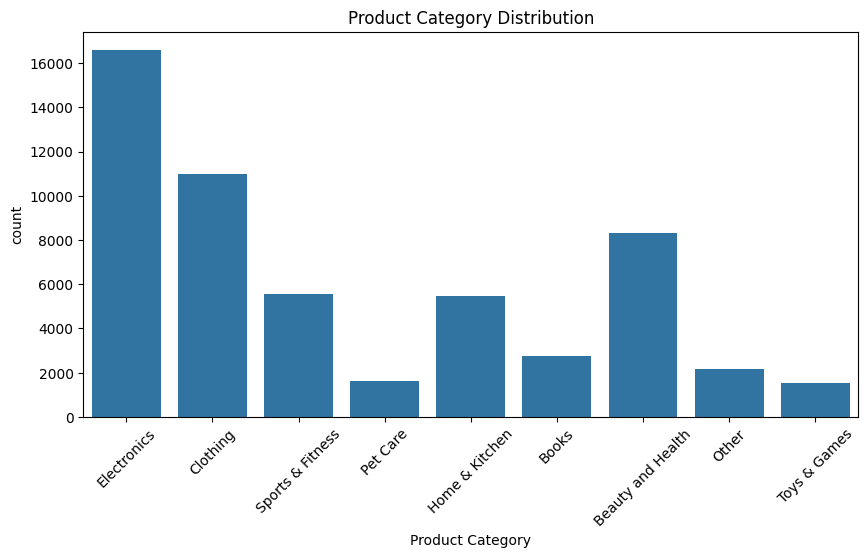

In [37]:
# Displaying Buttons
buttons_box = widgets.HBox([button1, button2, button3, button4, button5])
display(buttons_box)